In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
comp = pd.read_csv('consumer_complaints.csv')
comp.head()

date_received           product               sub_product  \
0    08/30/2013          Mortgage            Other mortgage   
1    08/30/2013          Mortgage            Other mortgage   
2    08/30/2013  Credit reporting                       NaN   
3    08/30/2013      Student loan  Non-federal student loan   
4    08/30/2013   Debt collection               Credit card   

                                      issue  \
0  Loan modification,collection,foreclosure   
1  Loan servicing, payments, escrow account   
2    Incorrect information on credit report   
3                        Repaying your loan   
4        False statements or representation   

                           sub_issue consumer_complaint_narrative  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                     Account status                          NaN   
3                 Repaying your loan                          NaN   
4  Attempted to collect wrong amount                          NaN   

  company_public_response                          company state zipcode tags  \
0                     NaN                     U.S. Bancorp    CA   95993  NaN   
1                     NaN            Wells Fargo & Company    CA   91104  NaN   
2                     NaN            Wells Fargo & Company    NY   11764  NaN   
3                     NaN          Navient Solutions, Inc.    MD   21402  NaN   
4                     NaN  Resurgent Capital Services L.P.    GA   30106  NaN   

  consumer_consent_provided submitted_via date_sent_to_company  \
0                       NaN      Referral           09/03/2013   
1                       NaN      Referral           09/03/2013   
2                       NaN   Postal mail           09/18/2013   
3                       NaN         Email           08/30/2013   
4                       NaN           Web           08/30/2013   

  company_response_to_consumer timely_response consumer_disputed?  \
0      Closed with explanation             Yes                Yes   
1      Closed with explanation             Yes                Yes   
2      Closed with explanation             Yes                 No   
3      Closed with explanation             Yes                Yes   
4      Closed with explanation             Yes                Yes   

   complaint_id  
0        511074  
1        511080  
2        510473  
3        510326  
4        511067

In [3]:
comp['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

In [4]:
comp['sub_product'].value_counts()

Other mortgage                            74319
Conventional fixed mortgage               57182
Checking account                          44369
Other (i.e. phone, health club, etc.)     29617
I do not know                             21634
Conventional adjustable mortgage (ARM)    20941
Credit card                               20825
FHA mortgage                              19152
Non-federal student loan                  17969
Medical                                   13297
Vehicle loan                              12168
Other bank product/service                10895
Payday loan                                9684
Home equity loan or line of credit         8944
Installment loan                           5279
Savings account                            3996
VA mortgage                                3735
Mortgage                                   3433
(CD) Certificate of deposit                2839
Auto                                       2523
International money transfer            

In [5]:
comp['company'].value_counts()

Bank of America                          55998
Wells Fargo & Company                    42024
JPMorgan Chase & Co.                     33881
Equifax                                  31828
Experian                                 30905
                                         ...  
Capital Recovery Corporation                 1
Brian A. Blitz, P.A.                         1
Account Information Management, Corp.        1
Bristlecone, Inc.                            1
ICUL Service Corporation                     1
Name: company, Length: 3605, dtype: int64

In [6]:
comp.isna().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [7]:
product_percentage = round(comp["product"].value_counts() / len(comp["product"]) * 100,2)

print(product_percentage)

labels = list(product_percentage.index)
values = product_percentage.values.tolist() 
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Mortgage                   33.54
Debt collection            18.18
Credit reporting           16.52
Credit card                11.96
Bank account or service    11.25
Consumer Loan               3.78
Student loan                2.85
Payday loan                 0.70
Money transfers             0.69
Prepaid card                0.44
Other financial service     0.10
Name: product, dtype: float64


In [8]:
#lets proceed with that data only which helps us for modelbuilding 

comp1 = comp.loc[:,['consumer_complaint_narrative', 'product']]
comp1

consumer_complaint_narrative           product
0                               NaN          Mortgage
1                               NaN          Mortgage
2                               NaN  Credit reporting
3                               NaN      Student loan
4                               NaN   Debt collection
...                             ...               ...
555952                          NaN          Mortgage
555953                          NaN          Mortgage
555954                          NaN          Mortgage
555955                          NaN   Debt collection
555956                          NaN   Debt collection

[555957 rows x 2 columns]

In [9]:
comp1 = comp1.dropna()
comp1

consumer_complaint_narrative           product
190126  XXXX has claimed I owe them {$27.00} for XXXX ...   Debt collection
190135  Due to inconsistencies in the amount owed that...     Consumer Loan
190155  In XX/XX/XXXX my wages that I earned at my job...          Mortgage
190207  I have an open and current mortgage with Chase...          Mortgage
190208  XXXX was submitted XX/XX/XXXX. At the time I s...          Mortgage
...                                                   ...               ...
553084  XXXX XXXX is reporting incorrectly, payments h...  Credit reporting
553085  Reflecting incorrect payment status. Have been...  Credit reporting
553086  I have been paying {$180.00} a month through d...       Payday loan
553090  I recently became aware that Amerisave Mortgag...          Mortgage
553096  Bank of America has demonstrated an on-going l...          Mortgage

[66806 rows x 2 columns]

In [10]:
comp1.isnull().sum()

consumer_complaint_narrative    0
product                         0
dtype: int64

In [11]:
# Clean the textual column
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [12]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: word_tokenize(x))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: word_lemmatizer(x))
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: ' '.join(x))
    return df

In [13]:
comp1.rename(columns={'consumer_complaint_narrative': 'complaints'}, inplace= True)
comp1.head()

complaints          product
190126  XXXX has claimed I owe them {$27.00} for XXXX ...  Debt collection
190135  Due to inconsistencies in the amount owed that...    Consumer Loan
190155  In XX/XX/XXXX my wages that I earned at my job...         Mortgage
190207  I have an open and current mortgage with Chase...         Mortgage
190208  XXXX was submitted XX/XX/XXXX. At the time I s...         Mortgage

In [14]:
comp1_clean = clean_text(comp1, 'complaints', 'complaints_clean')
comp1_clean

complaints           product  \
190126  XXXX has claimed I owe them {$27.00} for XXXX ...   Debt collection   
190135  Due to inconsistencies in the amount owed that...     Consumer Loan   
190155  In XX/XX/XXXX my wages that I earned at my job...          Mortgage   
190207  I have an open and current mortgage with Chase...          Mortgage   
190208  XXXX was submitted XX/XX/XXXX. At the time I s...          Mortgage   
...                                                   ...               ...   
553084  XXXX XXXX is reporting incorrectly, payments h...  Credit reporting   
553085  Reflecting incorrect payment status. Have been...  Credit reporting   
553086  I have been paying {$180.00} a month through d...       Payday loan   
553090  I recently became aware that Amerisave Mortgag...          Mortgage   
553096  Bank of America has demonstrated an on-going l...          Mortgage   

                                         complaints_clean  
190126  xxxx claimed owe xxxx year despite proof payme...  
190135  due inconsistency amount owed told bank amount...  
190155  xxxxxxxx wage earned job decreased almost half...  
190207  open current mortgage chase bank xxxx chase re...  
190208  xxxx submitted xxxxxxxx time submitted complai...  
...                                                   ...  
553084  xxxx xxxx reporting incorrectly payment time v...  
553085           reflecting incorrect payment status time  
553086  paying month direct debit withdrawal checking ...  
553090  recently became aware amerisave mortgage corpo...  
553096  bank america demonstrated ongoing level incomp...  

[66806 rows x 3 columns]

In [15]:
comp1_clean['product'].value_counts()

Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: product, dtype: int64

In [16]:
def x_rem(sent):
    sent = pd.DataFrame(re.sub(['x','xx','xxx','xxxx','xxxxx','xxxxxx','xxxxxx','xxxxxxxx','xxxxxxxxxxxx']," ", sent))
    return sent

In [17]:
#to remove x variables as they might be some confidential number or name that cant be disply

def remove_stopwords(text,stopwords=['x','xx','xxx','xxxx','xxxxx','xxxxxx','xxxxxx','xxxxxxxx']):
    filtered_words = [word for word in text.split() if word.lower() not in stopwords]
    return" ".join(filtered_words)

In [18]:
comp1_clean['complaints_clean'] = comp1_clean['complaints_clean'].apply(remove_stopwords, stopwords)
comp1_clean

complaints           product  \
190126  XXXX has claimed I owe them {$27.00} for XXXX ...   Debt collection   
190135  Due to inconsistencies in the amount owed that...     Consumer Loan   
190155  In XX/XX/XXXX my wages that I earned at my job...          Mortgage   
190207  I have an open and current mortgage with Chase...          Mortgage   
190208  XXXX was submitted XX/XX/XXXX. At the time I s...          Mortgage   
...                                                   ...               ...   
553084  XXXX XXXX is reporting incorrectly, payments h...  Credit reporting   
553085  Reflecting incorrect payment status. Have been...  Credit reporting   
553086  I have been paying {$180.00} a month through d...       Payday loan   
553090  I recently became aware that Amerisave Mortgag...          Mortgage   
553096  Bank of America has demonstrated an on-going l...          Mortgage   

                                         complaints_clean  
190126  claimed owe year despite proof payment sent ca...  
190135  due inconsistency amount owed told bank amount...  
190155  wage earned job decreased almost half knew tro...  
190207  open current mortgage chase bank chase reporti...  
190208  submitted time submitted complaint dealt rushm...  
...                                                   ...  
553084  reporting incorrectly payment time vehicle tur...  
553085           reflecting incorrect payment status time  
553086  paying month direct debit withdrawal checking ...  
553090  recently became aware amerisave mortgage corpo...  
553096  bank america demonstrated ongoing level incomp...  

[66806 rows x 3 columns]

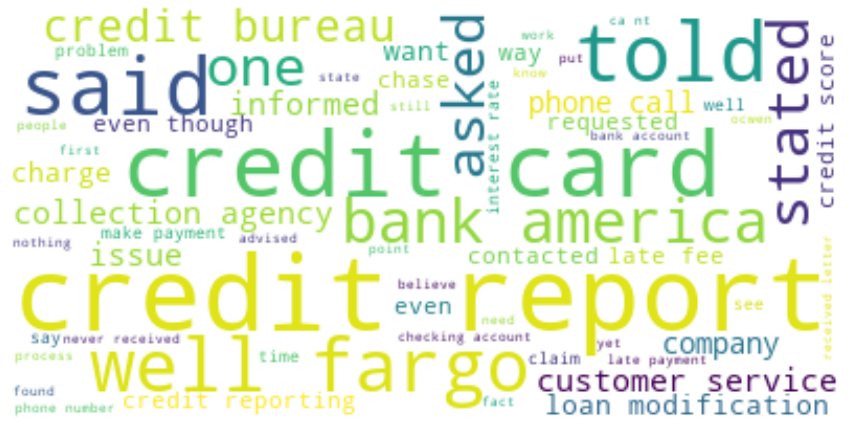

In [19]:
# lets plot wordcloud biagram

from collections import Counter

from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60, 
                      max_words=60, 
                      background_color="white", 
                      random_state=100).generate(str(Counter(comp1_clean['complaints_clean'])))
plt.figure(figsize=[15,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

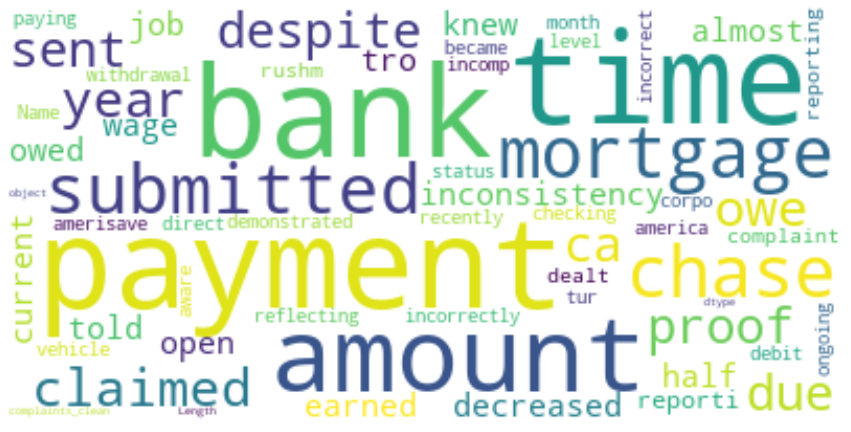

In [20]:
#wordcloud Unigram

from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60, 
                      max_words=60, 
                      background_color="white", 
                      random_state=100).generate(str(comp1_clean['complaints_clean']))
plt.figure(figsize=[15,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating a function to extract top ngrams(unigram/bigram/trigram) based on the function inputs

def top_ngrams(text,n=None, n_grams=(1,1)):
    rev_model = CountVectorizer(ngram_range=n_grams).fit(text)
    rev_df = rev_model.fit_transform(text)
    
    sum_words = rev_df.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word,idx in rev_model.vocabulary_.items()]
    word_freq = sorted(word_freq, key= lambda x : x[1], reverse= True)
    return word_freq[:n]

In [22]:
#Unigram 

n=30
unigram_top30 = top_ngrams(comp1_clean['complaints_clean'],n=n)
unigram_top30_data = pd.DataFrame(unigram_top30, columns = ['unigram', 'count'])
unigram_top30_data

unigram  count
0        credit  87341
1       account  84618
2       payment  68631
3          loan  55093
4         would  48026
5          bank  45015
6          time  41407
7        report  38396
8          debt  37122
9          told  36807
10         call  35476
11           nt  33738
12         card  32773
13      company  32179
14     mortgage  32149
15     received  32003
16  information  31311
17       called  29331
18          day  28142
19        month  27643
20       letter  27280
21          pay  26297
22         year  26095
23        never  26067
24          get  24757
25         sent  23522
26         paid  23318
27       number  23024
28         back  22599
29         said  22258

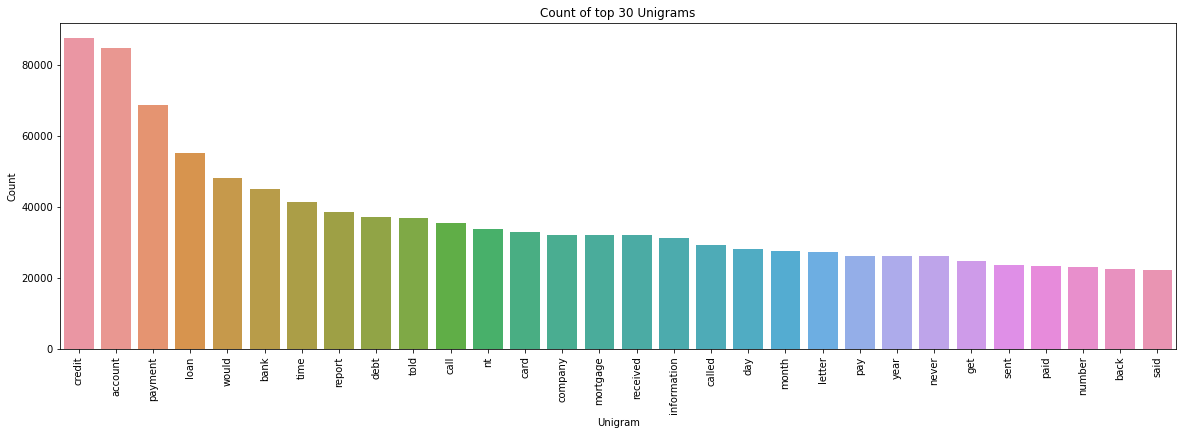

In [23]:
#plot all top 30 unigrams 

plt.figure(figsize=[20,6])
sns.barplot(x=unigram_top30_data['unigram'], y=unigram_top30_data['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [24]:
#bigrams

n=30
n_grams = (2,2)

bigram_top30 = top_ngrams(comp1_clean['complaints_clean'],n=n, n_grams=n_grams)
bigram_top30_data = pd.DataFrame(bigram_top30, columns = ['unigram', 'count'])
bigram_top30_data

unigram  count
0       credit report  22887
1         credit card  14435
2          well fargo   8878
3        bank america   7035
4       credit bureau   6398
5   collection agency   6006
6    customer service   5697
7          phone call   5291
8    credit reporting   4776
9   loan modification   4509
10       credit score   4440
11           late fee   4394
12        even though   4027
13       make payment   3991
14      interest rate   3940
15   checking account   3775
16         would like   3721
17              ca nt   3636
18       phone number   3465
19    received letter   3431
20     never received   3423
21       late payment   3288
22       bank account   3243
23   mortgage payment   3185
24    monthly payment   3124
25        capital one   2997
26    social security   2984
27   reporting agency   2961
28    debt collection   2934
29          call back   2930

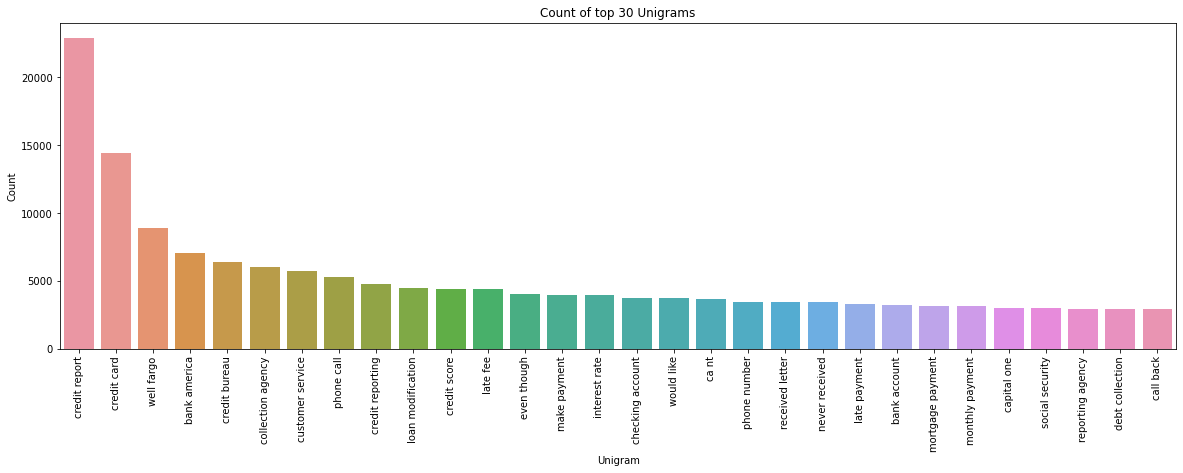

In [25]:
#plot all top 30 bigrams 

plt.figure(figsize=[20,6])
sns.barplot(x=bigram_top30_data['unigram'], y=bigram_top30_data['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [26]:
#trigram

n=30
n_grams = (3,3)

trigram_top30 = top_ngrams(comp1_clean['complaints_clean'],n=n, n_grams=n_grams)
trigram_top30_data = pd.DataFrame(trigram_top30, columns = ['unigram', 'count'])
trigram_top30_data

unigram  count
0                  credit reporting agency   2198
1                   social security number   1587
2                    fair credit reporting   1286
3                     credit reporting act   1260
4                      credit card account   1152
5                      credit card company   1133
6                    removed credit report   1042
7                information credit report    961
8                    account credit report    932
9                 debt collection practice    903
10                    fair debt collection    878
11                   victim identity theft    836
12                 collection practice act    773
13                         well fargo bank    747
14                  debt collection agency    688
15         customer service representative    688
16           consumer financial protection    659
17                     received phone call    651
18  xxxxxxxxxxxx xxxxxxxxxxxx xxxxxxxxxxxx    570
19                 called customer service    560
20             financial protection bureau    555
21                    ocwen loan servicing    545
22                  reported credit bureau    534
23                    customer service rep    529
24                            day past due    514
25                      copy credit report    492
26                      item credit report    474
27                        charged late fee    473
28                    attempt collect debt    458
29                    private student loan    454

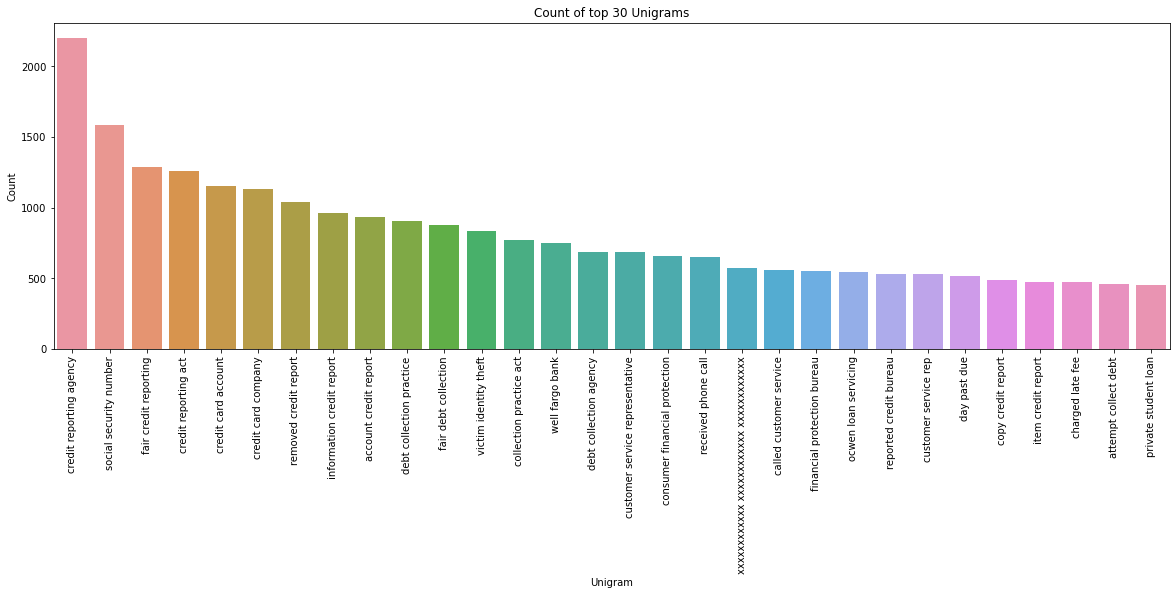

In [27]:
#plot all top 30 bigrams 

plt.figure(figsize=[20,6])
sns.barplot(x=trigram_top30_data['unigram'], y=trigram_top30_data['count'])
plt.xticks(rotation=90)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

In [28]:
#applying TFIDF vectorizer 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(min_df = 2, max_df = 0.95)

tfidf_df = tfidf_model.fit_transform(comp1_clean['complaints_clean'])
tfidf_df


<66806x24727 sparse matrix of type '<class 'numpy.float64'>'
	with 3782520 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5,
                                      learning_method='online',
                                      max_iter=20,
                                      random_state=42)

In [30]:
X_topics = lda_model.fit_transform(tfidf_df)

In [31]:
n_top_words = 15
topic_summaries = []

topic_word = lda_model.components_  # get the topic words




In [32]:
vocab = tfidf_model.get_feature_names()

In [33]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: payment | loan | account | bank | card | mortgage | would | credit | told | time | fee | month | nt | pay | money
Topic 1: midland | green | tree | funding | belongs | carrington | depot | flagstar | tcpa | lvnv | mcm | focus | gram | resided | gym
Topic 2: credit | debt | report | account | collection | information | company | reporting | call | agency | number | letter | experian | equifax | never
Topic 3: school | university | attended | college | appearing | genesis | nevada | eos | tuition | rec | medicaid | bmo | cca | alabama | semester
Topic 4: flood | bk | shellpoint | morgan | jp | wallet | hunter | warfield | honda | rushmore | nissan | global | wa | alliance | receiver


In [34]:
no_topics = 5
words = np.array(vocab)
topic_words = pd.DataFrame(np.zeros((no_topics, 15)), index=[f'Topic {i + 1}' for i in range(no_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(no_topics):
    ix = topic_word[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

Word 1      Word 2      Word 3   Word 4      Word 5       Word 6  \
Topic 1  payment        loan     account     bank        card     mortgage   
Topic 2  midland       green        tree  funding     belongs   carrington   
Topic 3   credit        debt      report  account  collection  information   
Topic 4   school  university    attended  college   appearing      genesis   
Topic 5    flood          bk  shellpoint   morgan          jp       wallet   

          Word 7     Word 8   Word 9   Word 10   Word 11 Word 12   Word 13  \
Topic 1    would     credit     told      time       fee   month        nt   
Topic 2    depot   flagstar     tcpa      lvnv       mcm   focus      gram   
Topic 3  company  reporting     call    agency    number  letter  experian   
Topic 4   nevada        eos  tuition       rec  medicaid     bmo       cca   
Topic 5   hunter   warfield    honda  rushmore    nissan  global        wa   

          Word 14   Word 15  
Topic 1       pay     money  
Topic 2   resided       gym  
Topic 3   equifax     never  
Topic 4   alabama  semester  
Topic 5  alliance  receiver

lets consider these as topics 
Topic 0 = Loan Department
Topic 1 = Theft/dispute reporting 
Topic 2 = Bank Account Service
Topic 3 = Other
Topic 4 = Customer Service

In [35]:
topic_results = lda_model.transform(tfidf_df)

#assigning best results to the topics 
comp1_clean['Topic'] = topic_results.argmax(axis=1)
comp1_clean

complaints           product  \
190126  XXXX has claimed I owe them {$27.00} for XXXX ...   Debt collection   
190135  Due to inconsistencies in the amount owed that...     Consumer Loan   
190155  In XX/XX/XXXX my wages that I earned at my job...          Mortgage   
190207  I have an open and current mortgage with Chase...          Mortgage   
190208  XXXX was submitted XX/XX/XXXX. At the time I s...          Mortgage   
...                                                   ...               ...   
553084  XXXX XXXX is reporting incorrectly, payments h...  Credit reporting   
553085  Reflecting incorrect payment status. Have been...  Credit reporting   
553086  I have been paying {$180.00} a month through d...       Payday loan   
553090  I recently became aware that Amerisave Mortgag...          Mortgage   
553096  Bank of America has demonstrated an on-going l...          Mortgage   

                                         complaints_clean  Topic  
190126  claimed owe year despite proof payment sent ca...      2  
190135  due inconsistency amount owed told bank amount...      0  
190155  wage earned job decreased almost half knew tro...      0  
190207  open current mortgage chase bank chase reporti...      2  
190208  submitted time submitted complaint dealt rushm...      0  
...                                                   ...    ...  
553084  reporting incorrectly payment time vehicle tur...      0  
553085           reflecting incorrect payment status time      2  
553086  paying month direct debit withdrawal checking ...      0  
553090  recently became aware amerisave mortgage corpo...      0  
553096  bank america demonstrated ongoing level incomp...      0  

[66806 rows x 4 columns]

In [36]:
comp1_clean['Topic'].value_counts()

0    41338
2    25406
3       22
4       22
1       18
Name: Topic, dtype: int64

In [37]:
#Print the first 5 Complaint for each of the Topics
comp1_clean_sort=comp1_clean.groupby('Topic').head(5)
comp1_clean_sort.sort_values('Topic')

complaints           product  \
190135  Due to inconsistencies in the amount owed that...     Consumer Loan   
190155  In XX/XX/XXXX my wages that I earned at my job...          Mortgage   
190208  XXXX was submitted XX/XX/XXXX. At the time I s...          Mortgage   
190238  This complaint is against Wells Fargo Bank for...          Mortgage   
190251  I spoke to XXXX of green tree representatives ...          Mortgage   
243386  Still NOT resolved. \nXXXXCompany reviewIn pro...       Credit card   
223950           They said the ss number belongs to me \n  Credit reporting   
244864  ALLIANT ALSO CALLED ( XXXX ) XXXX, ( XXXX ) XX...   Debt collection   
210963  I have been paying XXXX : XXXX XXXX - XXXX acc...  Credit reporting   
236473  For the XXXX time, McCarthy Burgess & Wolff is...   Debt collection   
190126  XXXX has claimed I owe them {$27.00} for XXXX ...   Debt collection   
190587  Mel S. Harris & assoc. used deceptive collecti...       Credit card   
190237  Experian is reporting my OPEN and CURRENT Mort...          Mortgage   
190207  I have an open and current mortgage with Chase...          Mortgage   
191015  a incorrect reporting by cavalry portfolio on ...   Debt collection   
205607  XXXX {$68000.00} account reported on XX/XX/XXX...  Credit reporting   
246872               here is what XXXX sold me to.XXXX \n          Mortgage   
243770  only autorized XXXX pull on XXXX XXXX 2015 and...  Credit reporting   
235300  Account # 1 $ XXXXBalanceXXXX SYNCHRONY BANKOr...   Debt collection   
195695                               This isnt my debt \n   Debt collection   
209879  Repeated robot calls for a different person of...   Debt collection   
225789  There is a hard inquery on my credit report th...  Credit reporting   
217799                Car was a lemon and was returned \n   Debt collection   
242298  FST NAT COLL XXXX XXXX XX/XX/XXXX Open $ XXXX ...   Debt collection   
247166  PROFESSIONAL MED ADJ BUR is trying to collect ...   Debt collection   

                                         complaints_clean  Topic  
190135  due inconsistency amount owed told bank amount...      0  
190155  wage earned job decreased almost half knew tro...      0  
190208  submitted time submitted complaint dealt rushm...      0  
190238  complaint well fargo bank violation term condi...      0  
190251  spoke green tree representative annual escrow ...      0  
243386   still resolved xxxxcompany reviewin progressxxxx      1  
223950                              said s number belongs      1  
244864      alliant also called violation fcpa fdcpa fcra      1  
210963  paying account closedxxxx account showing day ...      1  
236473  time mccarthy burgess wolff attempting collect...      1  
190126  claimed owe year despite proof payment sent ca...      2  
190587  mel harris assoc used deceptive collection pra...      2  
190237  experian reporting open current mortgage loan ...      2  
190207  open current mortgage chase bank chase reporti...      2  
191015  incorrect reporting cavalry portfolio credit r...      2  
205607  account reported openaccount xxxxxxxxcurrent b...      3  
246872                                        sold toxxxx      3  
243770                                     autorized pull      3  
235300  account xxxxbalancexxxx synchrony bankoriginal...      3  
195695                                          isnt debt      3  
209879  repeated robot call different person last name...      4  
225789                    hard inquery credit report appl      4  
217799                                 car lemon returned      4  
242298  fst nat coll open never signed contract report...      4  
247166  professional med adj bur trying collect medica...      4

In [38]:
#Create the dictionary of Topic names and Topics
Topic_names = { 0:"Loan Department", 1:"Theft/dispute reporting", 2: "Bank Account Service",
               3:"Other", 4:" Customer Service" }
#Replace Topics with Topic Names
comp1_clean['Topic'] = comp1_clean['Topic'].map(Topic_names)
comp1_clean

complaints           product  \
190126  XXXX has claimed I owe them {$27.00} for XXXX ...   Debt collection   
190135  Due to inconsistencies in the amount owed that...     Consumer Loan   
190155  In XX/XX/XXXX my wages that I earned at my job...          Mortgage   
190207  I have an open and current mortgage with Chase...          Mortgage   
190208  XXXX was submitted XX/XX/XXXX. At the time I s...          Mortgage   
...                                                   ...               ...   
553084  XXXX XXXX is reporting incorrectly, payments h...  Credit reporting   
553085  Reflecting incorrect payment status. Have been...  Credit reporting   
553086  I have been paying {$180.00} a month through d...       Payday loan   
553090  I recently became aware that Amerisave Mortgag...          Mortgage   
553096  Bank of America has demonstrated an on-going l...          Mortgage   

                                         complaints_clean  \
190126  claimed owe year despite proof payment sent ca...   
190135  due inconsistency amount owed told bank amount...   
190155  wage earned job decreased almost half knew tro...   
190207  open current mortgage chase bank chase reporti...   
190208  submitted time submitted complaint dealt rushm...   
...                                                   ...   
553084  reporting incorrectly payment time vehicle tur...   
553085           reflecting incorrect payment status time   
553086  paying month direct debit withdrawal checking ...   
553090  recently became aware amerisave mortgage corpo...   
553096  bank america demonstrated ongoing level incomp...   

                       Topic  
190126  Bank Account Service  
190135       Loan Department  
190155       Loan Department  
190207  Bank Account Service  
190208       Loan Department  
...                      ...  
553084       Loan Department  
553085  Bank Account Service  
553086       Loan Department  
553090       Loan Department  
553096       Loan Department  

[66806 rows x 4 columns]

# model building 

In [39]:
comp1_clean['product'].value_counts()

Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: product, dtype: int64

In [40]:
comp1_clean['Topic'].value_counts()

Loan Department            41338
Bank Account Service       25406
Other                         22
 Customer Service             22
Theft/dispute reporting       18
Name: Topic, dtype: int64

In [41]:
data = comp1_clean[['complaints', 'Topic']]
data 

complaints  \
190126  XXXX has claimed I owe them {$27.00} for XXXX ...   
190135  Due to inconsistencies in the amount owed that...   
190155  In XX/XX/XXXX my wages that I earned at my job...   
190207  I have an open and current mortgage with Chase...   
190208  XXXX was submitted XX/XX/XXXX. At the time I s...   
...                                                   ...   
553084  XXXX XXXX is reporting incorrectly, payments h...   
553085  Reflecting incorrect payment status. Have been...   
553086  I have been paying {$180.00} a month through d...   
553090  I recently became aware that Amerisave Mortgag...   
553096  Bank of America has demonstrated an on-going l...   

                       Topic  
190126  Bank Account Service  
190135       Loan Department  
190155       Loan Department  
190207  Bank Account Service  
190208       Loan Department  
...                      ...  
553084       Loan Department  
553085  Bank Account Service  
553086       Loan Department  
553090       Loan Department  
553096       Loan Department  

[66806 rows x 2 columns]

In [42]:
Topic_names1 = { "Loan Department": 0, "Theft/dispute reporting": 1, "Bank Account Service": 2,
               "Other" : 3, " Customer Service": 4 }
#Replace Topics with Topic Names
data['Topic'] = data['Topic'].map(Topic_names1)
data

complaints  Topic
190126  XXXX has claimed I owe them {$27.00} for XXXX ...      2
190135  Due to inconsistencies in the amount owed that...      0
190155  In XX/XX/XXXX my wages that I earned at my job...      0
190207  I have an open and current mortgage with Chase...      2
190208  XXXX was submitted XX/XX/XXXX. At the time I s...      0
...                                                   ...    ...
553084  XXXX XXXX is reporting incorrectly, payments h...      0
553085  Reflecting incorrect payment status. Have been...      2
553086  I have been paying {$180.00} a month through d...      0
553090  I recently became aware that Amerisave Mortgag...      0
553096  Bank of America has demonstrated an on-going l...      0

[66806 rows x 2 columns]

In [43]:
#as the data is in textual format we need to convert that in numeric format by taking the help of tfidf and countvectoriser 

#applying countvectoriser

count_model1 = CountVectorizer()
data_cv = count_model1.fit_transform(data['complaints'])

In [44]:
# applying tfidf vectoriser

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_trasformer = TfidfTransformer()
data_tfidf = tfidf_trasformer.fit_transform(data_cv)

tfidf_model1 = TfidfVectorizer()
tfidf_vect = tfidf_model1.fit_transform(data['complaints'])

In [45]:
# split the data 

x= tfidf_vect
y= data['Topic']


print(y.head())

190126    2
190135    0
190155    0
190207    2
190208    0
Name: Topic, dtype: int64


In [46]:
#split the data into train and test

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [47]:
ytrain.value_counts()

0    28928
2    17795
3       17
1       12
4       12
Name: Topic, dtype: int64

In [48]:
28928+17795+17+12+12


46764

In [49]:
print(28928/46764)
print(17795/46764)
print(17/46764)
print(12/46764)
print(12/46764)

0.6185955008125908
0.3805277563938072
0.0003635274997861603
0.00025660764690787786
0.00025660764690787786


In [50]:
ytest.value_counts()

0    12410
2     7611
4       10
1        6
3        5
Name: Topic, dtype: int64

In [51]:
12410+7611+10+6+5

20042

In [52]:
print(12410/20042)
print(7611/20042)
print(10/20042)
print(6/20042)
print(5/20042)

0.6191996806705917
0.3797525197086119
0.0004989522003792037
0.0002993713202275222
0.00024947610018960184


# Decision Tree

In [53]:
# lets use decision tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


DT = DecisionTreeClassifier(criterion= 'entropy')

param = {'min_samples_leaf' : list(range(1,9)),
        'max_depth' : list(range(1,9)),
        'max_features' : ['sqrt']}

grid_search = GridSearchCV(estimator= DT,
                          param_grid= param,
                          n_jobs= -1,
                          scoring= 'accuracy',
                          cv= 5,
                          refit= True,
                          return_train_score= True)

grid_search.fit(xtrain,ytrain)
grid_search.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 5}

In [54]:
estimator = grid_search.best_estimator_

from sklearn.metrics import accuracy_score, confusion_matrix

print('confusion metrix :', confusion_matrix(ytest, estimator.predict(xtest)))
print('accuracy score :',accuracy_score(ytest, estimator.predict(xtest)))


confusion metrix : [[6860    0 5550    0    0]
 [   0    0    6    0    0]
 [1861    0 5750    0    0]
 [   0    0    5    0    0]
 [   0    0   10    0    0]]
accuracy score : 0.6291787246781758


In [55]:
print('confusion metrix :',
     confusion_matrix(ytrain, estimator.predict(xtrain)))
print('--------------------------------------------------------')
print('accuracy score :', accuracy_score(ytrain, estimator.predict(xtrain)))

confusion metrix : [[16135     0 12793     0     0]
 [    0     0    12     0     0]
 [ 4195     0 13600     0     0]
 [    1     0    16     0     0]
 [    2     0    10     0     0]]
--------------------------------------------------------
accuracy score : 0.6358523650671457


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param1 = {'min_samples_leaf' : list(range(1,9)),
        'max_depth' : list(range(1,9)),
        'max_features' : ['sqrt']}

grid_search1 = GridSearchCV(estimator= rf,
                           param_grid= param1,
                           cv= 5,
                           n_jobs= -1,
                           scoring= 'accuracy',
                           refit= True,
                           return_train_score= True)

grid_search1.fit(xtrain, ytrain)
grid_search1.best_params_

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1}

In [57]:
estimator1 = grid_search1.best_estimator_

print('confusion matrix :',
     confusion_matrix(ytest, estimator.predict(xtest)))

print('------------------------------------------------------')

print('caccuracy score :', accuracy_score(ytest, estimator.predict(xtest)))


confusion matrix : [[6860    0 5550    0    0]
 [   0    0    6    0    0]
 [1861    0 5750    0    0]
 [   0    0    5    0    0]
 [   0    0   10    0    0]]
------------------------------------------------------
caccuracy score : 0.6291787246781758


In [58]:
print('confusion matrix :',
     confusion_matrix(ytrain, estimator.predict(xtrain)))

print('------------------------------------------------------')

print('caccuracy score :', accuracy_score(ytrain, estimator.predict(xtrain)))

confusion matrix : [[16135     0 12793     0     0]
 [    0     0    12     0     0]
 [ 4195     0 13600     0     0]
 [    1     0    16     0     0]
 [    2     0    10     0     0]]
------------------------------------------------------
caccuracy score : 0.6358523650671457
